# Import All Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
# remember confusion matrices lets import that and execute it later

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("GSE44076_merged_data.csv")

In [6]:
df

,geo_accession,sample_type,individual_id,stage,location,gender,age,status,11715100_at,11715101_s_at,...,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM1077598,Mucosa,A2119,--,Left,Male,62,Public on Mar 14 2014,3.6599,4.1524,...,1.9475,2.1732,2.3173,2.0892,7.0313,4.8902,5.9995,2.1907,2.1474,2.1102
1,GSM1077599,Mucosa,A2142,--,Left,Female,77,Public on Mar 14 2014,2.5712,4.1879,...,1.9056,1.9503,2.0665,2.0585,7.3201,5.2443,6.2646,1.9371,2.2677,2.3093
2,GSM1077600,Mucosa,B2104,--,Left,Female,78,Public on Mar 14 2014,3.3174,4.1040,...,2.5070,2.4232,2.4662,2.2127,8.0270,5.8140,6.3628,2.1923,2.2233,2.2221
3,GSM1077601,Mucosa,B2127,--,Right,Male,65,Public on Mar 14 2014,3.1835,4.3635,...,2.0228,2.7202,2.4453,2.3259,7.1081,4.7067,5.1356,2.0068,2.2773,2.2656
4,GSM1077602,Mucosa,B2150,--,Right,Female,52,Public on Mar 14 2014,2.9949,4.5227,...,1.9309,2.1284,2.6587,2.4271,7.7353,5.2432,6.1207,2.1847,2.3030,2.1275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,GSM1077839,Tumor,Y2099,IIA,Right,Male,72,Public on Mar 14 2014,2.7624,3.7898,...,1.8331,2.3223,2.3968,2.1180,6.9047,4.9615,5.9032,2.0684,1.9758,2.2050
242,GSM1077840,Tumor,Z2015,IIA,Right,Male,84,Public on Mar 14 2014,2.5775,3.7737,...,2.1370,2.0858,2.2515,2.0265,7.0130,4.9894,5.8160,1.9110,2.1660,2.0183
243,GSM1077841,Tumor,Z2038,IIA,Right,Female,65,Public on Mar 14 2014,3.1441,4.3357,...,1.8654,2.4228,2.1907,2.2586,6.4545,4.3336,5.1489,2.1146,2.0619,2.0312
244,GSM1077842,Tumor,Z2061,IIA,Left,Male,53,Public on Mar 14 2014,4.8256,5.4895,...,1.9590,2.4964,2.0703,2.1757,6.9920,4.9551,6.0431,2.0207,2.2717,2.2361


In [7]:
df.columns

Index(['geo_accession', 'sample_type', 'individual_id', 'stage', 'location',
       'gender', 'age', 'status', '11715100_at', '11715101_s_at',
       ...
       'AFFX-r2-TagO-3_at', 'AFFX-r2-TagO-5_at', 'AFFX-r2-TagQ-3_at',
       'AFFX-r2-TagQ-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=49394)

## Only keeping meta data column Sample type ( Target Variable)

In [8]:
import pandas as pd

# Example list of metadata columns
metadata_columns = ['geo_accession', 'individual_id', 'stage', 'location',
                    'gender', 'age', 'status']

# Load your DataFrame (assuming df is already loaded)
# Drop all metadata columns except 'sample_type'
df_filtered = df.drop(columns=[col for col in metadata_columns if col in df.columns])

# Display the new DataFrame structure
print(df_filtered.head())


  sample_type  11715100_at  11715101_s_at  11715102_x_at  11715103_x_at  \
0      Mucosa       3.6599         4.1524         3.3896         3.8929   
1      Mucosa       2.5712         4.1879         3.1228         3.7299   
2      Mucosa       3.3174         4.1040         3.2434         4.1048   
3      Mucosa       3.1835         4.3635         3.1175         3.3426   
4      Mucosa       2.9949         4.5227         3.3627         3.3376   

   11715104_s_at  11715105_at  11715106_x_at  11715107_s_at  11715108_x_at  \
0         7.3799       2.0732         2.8276         2.6345         2.5165   
1         7.7642       2.3151         2.8944         2.4020         2.5873   
2         6.4705       2.1824         2.7407         2.4271         2.5785   
3         7.0046       2.1961         2.4710         2.2932         2.3527   
4         6.9029       2.5087         2.8609         2.4833         2.3683   

   ...  AFFX-r2-TagO-3_at  AFFX-r2-TagO-5_at  AFFX-r2-TagQ-3_at  \
0  ...       

## Place target column at last column 

In [9]:
import pandas as pd

# Assuming df is your DataFrame
target_column = 'sample_type'  # Column to move

# Reorder columns: Drop target column and add it at the end
df_filtered = df_filtered[[col for col in df_filtered.columns if col != target_column] + [target_column]]

# Display the modified DataFrame structure
print(df_filtered.head())


   11715100_at  11715101_s_at  11715102_x_at  11715103_x_at  11715104_s_at  \
0       3.6599         4.1524         3.3896         3.8929         7.3799   
1       2.5712         4.1879         3.1228         3.7299         7.7642   
2       3.3174         4.1040         3.2434         4.1048         6.4705   
3       3.1835         4.3635         3.1175         3.3426         7.0046   
4       2.9949         4.5227         3.3627         3.3376         6.9029   

   11715105_at  11715106_x_at  11715107_s_at  11715108_x_at  11715109_at  ...  \
0       2.0732         2.8276         2.6345         2.5165       2.4795  ...   
1       2.3151         2.8944         2.4020         2.5873       2.2066  ...   
2       2.1824         2.7407         2.4271         2.5785       2.6003  ...   
3       2.1961         2.4710         2.2932         2.3527       2.4741  ...   
4       2.5087         2.8609         2.4833         2.3683       2.3747  ...   

   AFFX-r2-TagO-5_at  AFFX-r2-TagQ-3_at  AFF

In [10]:
df_filtered.shape

(246, 49387)

In [11]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Columns: 49387 entries, 11715100_at to sample_type
dtypes: float64(49386), object(1)
memory usage: 92.7+ MB


In [12]:
df_filtered.describe()

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,...,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,...,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,3.288019,4.102380,3.375700,3.557335,5.275933,2.342817,2.645889,2.344843,2.381449,2.372574,...,1.970992,2.296948,2.331161,2.129917,7.391435,4.877451,6.045564,2.055701,2.167706,2.205929
std,0.556674,0.464731,0.524666,0.424345,2.122396,0.541065,0.237837,0.201904,0.207962,0.205913,...,0.148010,0.172562,0.177752,0.159759,0.593706,0.680868,0.654607,0.097120,0.118026,0.107651
min,2.265800,2.922400,2.392600,2.429300,2.263200,1.903400,2.120700,1.779600,1.922100,1.926100,...,1.650100,1.910300,1.936300,1.805400,5.769600,3.246800,4.502200,1.809900,1.919600,1.976000
25%,2.923250,3.795850,3.041750,3.269725,2.955375,2.162425,2.487300,2.208325,2.236075,2.233375,...,1.878450,2.176400,2.214250,2.014775,7.008400,4.408075,5.608000,1.985500,2.084025,2.135750
50%,3.200600,4.054750,3.284550,3.489650,6.113050,2.248150,2.598600,2.349650,2.350550,2.341950,...,1.948800,2.278450,2.317600,2.112300,7.357900,4.846200,6.052400,2.049750,2.159500,2.201050
75%,3.478275,4.360975,3.567525,3.721675,7.174200,2.369750,2.772175,2.483150,2.516050,2.502600,...,2.055325,2.409800,2.418150,2.232525,7.792550,5.285550,6.459300,2.124575,2.245525,2.264700
max,6.066900,5.967600,5.852600,5.410700,8.840200,7.144700,3.547900,2.855700,3.038600,3.073600,...,2.507000,2.953400,3.019000,2.626000,9.074700,7.120200,8.025000,2.328900,2.841300,2.551800


# Data Exploration & Cleaning

In [13]:
df_filtered.shape

(246, 49387)

In [14]:
df_filtered.columns

Index(['11715100_at', '11715101_s_at', '11715102_x_at', '11715103_x_at',
       '11715104_s_at', '11715105_at', '11715106_x_at', '11715107_s_at',
       '11715108_x_at', '11715109_at',
       ...
       'AFFX-r2-TagO-5_at', 'AFFX-r2-TagQ-3_at', 'AFFX-r2-TagQ-5_at',
       'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at', 'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at',
       'AFFX-TrpnX-5_at', 'AFFX-TrpnX-M_at', 'sample_type'],
      dtype='object', length=49387)

In [15]:
#let's check some of the columns (first, second and third columns)
print(df_filtered.columns[0:3])

Index(['11715100_at', '11715101_s_at', '11715102_x_at'], dtype='object')


In [16]:
#lets check the name of the last column of this dataframe

df_filtered.columns[-1]

'sample_type'

In [17]:
#check for missing values
datanul=df_filtered.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [18]:
print(df_filtered['sample_type'].value_counts())

sample_type
Normal    98
Tumor     98
Mucosa    50
Name: count, dtype: int64


<Axes: xlabel='sample_type'>

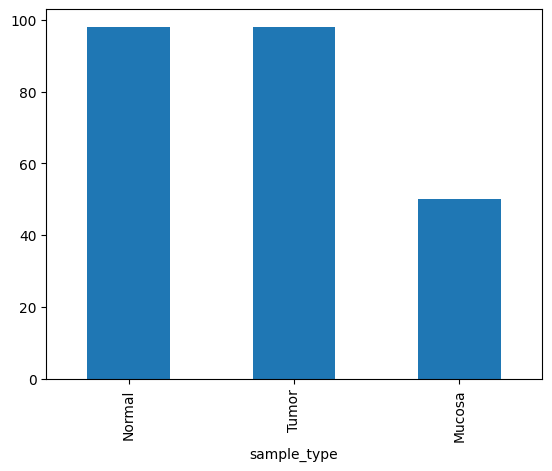

In [19]:
#plot a bar chat to display the class distribution

df_filtered['sample_type'].value_counts().plot.bar()

# Data Preprocessing

In [20]:
X=df_filtered.iloc[:,0:-1]
y=df_filtered.iloc[:,-1]

In [21]:
X.shape

(246, 49386)

In [22]:
X.head()

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,...,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,3.6599,4.1524,3.3896,3.8929,7.3799,2.0732,2.8276,2.6345,2.5165,2.4795,...,1.9475,2.1732,2.3173,2.0892,7.0313,4.8902,5.9995,2.1907,2.1474,2.1102
1,2.5712,4.1879,3.1228,3.7299,7.7642,2.3151,2.8944,2.4020,2.5873,2.2066,...,1.9056,1.9503,2.0665,2.0585,7.3201,5.2443,6.2646,1.9371,2.2677,2.3093
2,3.3174,4.1040,3.2434,4.1048,6.4705,2.1824,2.7407,2.4271,2.5785,2.6003,...,2.5070,2.4232,2.4662,2.2127,8.0270,5.8140,6.3628,2.1923,2.2233,2.2221
3,3.1835,4.3635,3.1175,3.3426,7.0046,2.1961,2.4710,2.2932,2.3527,2.4741,...,2.0228,2.7202,2.4453,2.3259,7.1081,4.7067,5.1356,2.0068,2.2773,2.2656
4,2.9949,4.5227,3.3627,3.3376,6.9029,2.5087,2.8609,2.4833,2.3683,2.3747,...,1.9309,2.1284,2.6587,2.4271,7.7353,5.2432,6.1207,2.1847,2.3030,2.1275


In [23]:
y.shape

(246,)

In [24]:
y.head()

0    Mucosa
1    Mucosa
2    Mucosa
3    Mucosa
4    Mucosa
Name: sample_type, dtype: object

# Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
#let's encode target labels (y) with values between 0 and n_classes-1.
#encoding will be done using the LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [27]:
labels

array(['Mucosa', 'Normal', 'Tumor'], dtype=object)

In [28]:
classes

array([0, 1, 2])

#  Data Splitting

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#split data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [31]:
df_filtered.iloc[:,0:10].describe()

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,3.288019,4.102380,3.375700,3.557335,5.275933,2.342817,2.645889,2.344843,2.381449,2.372574
std,0.556674,0.464731,0.524666,0.424345,2.122396,0.541065,0.237837,0.201904,0.207962,0.205913
min,2.265800,2.922400,2.392600,2.429300,2.263200,1.903400,2.120700,1.779600,1.922100,1.926100
25%,2.923250,3.795850,3.041750,3.269725,2.955375,2.162425,2.487300,2.208325,2.236075,2.233375
50%,3.200600,4.054750,3.284550,3.489650,6.113050,2.248150,2.598600,2.349650,2.350550,2.341950
75%,3.478275,4.360975,3.567525,3.721675,7.174200,2.369750,2.772175,2.483150,2.516050,2.502600
max,6.066900,5.967600,5.852600,5.410700,8.840200,7.144700,3.547900,2.855700,3.038600,3.073600


## Data Normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
# scale data between 0 and 1

min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

## **Feature Selection**
The purpose of feature selection is to select relevant features for classification. 
Feature selection is usually used as a pre-processing step before doing the actual learning. 

In this tutorial, mutual information algorithm is used to compute the relevance of each feature. The top n (eg. 300) features are selected for the machine learning analysis.

## Feature Selection using mutual information

In [34]:
MI=mutual_info_classif(X_train_norm,y_train)

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top k features
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_norm, y_train)

# Get indices of selected features
selected_scores_indices = selector.get_support(indices=True)

# Apply the same transformation to the test set
X_test_selected = X_test_norm[:, selected_scores_indices]


In [36]:
X_train_selected.shape

(196, 10)

In [37]:
X_test_selected.shape

(50, 10)

# Classification

## Model Training

In [38]:
#Random Forest Classifier
#because we are dealing with multiclass data, the one versus rest strategy is used.
#learn to predict each class against the other.

RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_pred =RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)

### Model Evaluation

After training the model, it is important to know how the model performs on an independent data(i.e. the test data). The following metrics are used to evaluate the model
- accuracy
- precision
- recall
- f1 score
- confusion matrix
- ROC Curve


In [39]:
#accuracy
#accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
#print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

precision:0.8982
recall:0.8400
f1score:0.8222


classification report


              precision    recall  f1-score   support

      Mucosa       1.00      0.38      0.56        13
      Normal       0.64      1.00      0.78        14
       Tumor       1.00      1.00      1.00        23

    accuracy                           0.84        50
   macro avg       0.88      0.79      0.78        50
weighted avg       0.90      0.84      0.82        50



In [40]:
from sklearn.metrics import confusion_matrix
cm_df=confusion_matrix(y_test, y_pred)

In [41]:
cm_df

array([[ 5,  8,  0],
       [ 0, 14,  0],
       [ 0,  0, 23]])

Text(50.722222222222214, 0.5, 'True Labels')

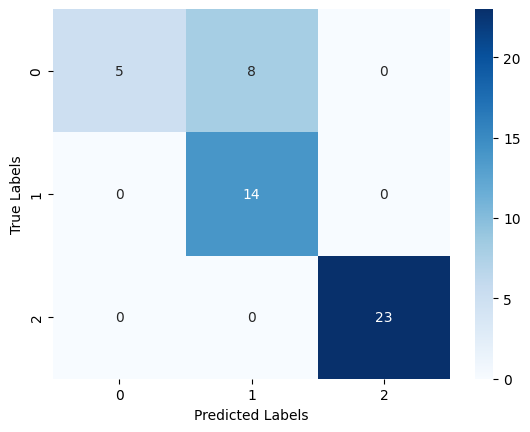

In [42]:
#visualize the confusion matrix using seaborn

sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Accuracy

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8400


# Multi-class ROC Curve

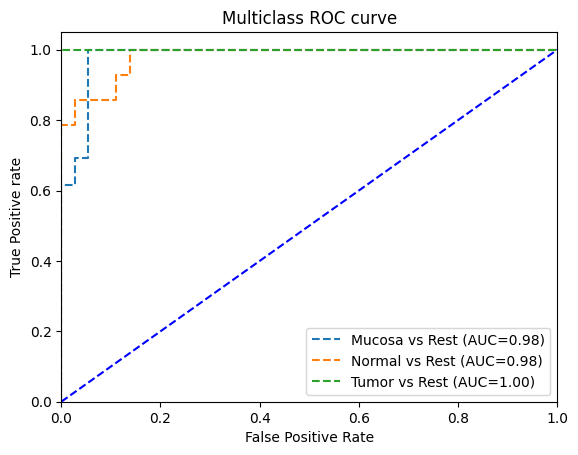

In [45]:
#roc curves will be generated for each class
#we will therefore have to binarize the y_test labels
#this is done because the probabilities(pred_prob) are calculated for each each class
#we therefore need to put the y_test label in the same format as the pred_prob
y_test_binarized=label_binarize(y_test,classes=classes)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()    

In [46]:
 # Load libraries
 from pandas import read_csv
 from pandas.plotting import scatter_matrix
 from matplotlib import pyplot
 from sklearn.model_selection import train_test_split
 from sklearn.model_selection import KFold
 from sklearn.model_selection import cross_val_score
 from sklearn.metrics import classification_report
 from sklearn.metrics import confusion_matrix
 from sklearn.metrics import accuracy_score
 from sklearn.linear_model import LogisticRegression
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 from sklearn.naive_bayes import GaussianNB
 from sklearn.svm import SVC

In [47]:
 # Split-out validation dataset
 array = df_filtered.values
 X = array[:,0:4]
 Y = array[:,4]
 X=df_filtered.iloc[:,0:-1]
 Y=df_filtered.iloc[:,-1]
 validation_size = 0.30
 seed = 7
 X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)
  # Spot-Check Algorithms

In [48]:
Y_train

157     Tumor
28     Mucosa
63     Normal
194     Tumor
138    Normal
        ...  
211     Tumor
67     Normal
25     Mucosa
196     Tumor
175     Tumor
Name: sample_type, Length: 172, dtype: object

In [49]:
 # Split-out validation dataset
 #array = df_filtered.values
 X=df_filtered.iloc[:,0:-1]
 Y=df_filtered.iloc[:,-1]
 validation_size = 0.30
 seed = 7
 X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)
  # Spot-Check Algorithms
 models = []
 models.append(('LR', LogisticRegression()))
 models.append(('LDA', LinearDiscriminantAnalysis()))
 models.append(('KNN', KNeighborsClassifier()))
 models.append(('CART', DecisionTreeClassifier()))
 models.append(('NB', GaussianNB()))
 models.append(('SVM', SVC()))
 # evaluate each model in turn
 results = []
 names = []
 for name, model in models:
     kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
     cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
     results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)

LR: 0.994444 (0.016667)
LDA: 0.988562 (0.022887)
KNN: 0.988562 (0.022887)
CART: 0.953595 (0.023237)
NB: 0.971569 (0.037774)
SVM: 0.839216 (0.122702)


# WithOut k-fold validation

In [50]:
 # Split-out validation dataset
 #array = dataset.values
 X=df_filtered.iloc[:,0:-1]
 Y=df_filtered.iloc[:,-1]
 validation_size = 0.30
 seed = 7
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=validation_size, random_state=seed)
  # Spot-Check Algorithms
 models = []
 models.append(('LR', LogisticRegression()))
 models.append(('LDA', LinearDiscriminantAnalysis()))
 models.append(('KNN', KNeighborsClassifier()))
 models.append(('CART', DecisionTreeClassifier()))
 models.append(('NB', GaussianNB()))
 models.append(('SVM', SVC()))
 # evaluate each model in turn
 results = []
 names = []
 for name, model in models:
     
     cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
     results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)

LR: 0.994444 (0.016667)
LDA: 0.988562 (0.022887)
KNN: 0.988562 (0.022887)
CART: 0.947386 (0.055468)
NB: 0.971569 (0.037774)
SVM: 0.839216 (0.122702)


# Select the best model from base model 

In [53]:
 # Load libraries
 from pandas import read_csv
 from pandas.plotting import scatter_matrix
 from matplotlib import pyplot
 from sklearn.model_selection import train_test_split
 from sklearn.model_selection import KFold
 from sklearn.model_selection import cross_val_score
 from sklearn.metrics import classification_report
 from sklearn.metrics import confusion_matrix
 from sklearn.metrics import accuracy_score
 from sklearn.linear_model import LogisticRegression
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.naive_bayes import GaussianNB
 from sklearn.svm import SVC
 import warnings
 warnings.filterwarnings("ignore")
 #print(dataset.shape)
 #print(dataset.head(20))
 #print(dataset.describe())
 #print(dataset.groupby('class').size())
 # histograms
 #dataset.hist()
 #pyplot.show()
 # Split-out validation dataset
 X=df_filtered.iloc[:,0:-1]
 Y=df_filtered.iloc[:,-1]
 validation_size = 0.30
 seed = 7
 # Spot-Check Algorithms
 models = LogisticRegression()
 kfold = KFold(n_splits=10)
 results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 print("Training Accuracy:", results.mean()*100)
 models.fit(X_train,Y_train)
 predictions = models.predict(X_test)
 print(confusion_matrix(Y_test, predictions))
 print(classification_report(Y_validation, predictions))

Training Accuracy: 83.03921568627452
[[17  0  0]
 [ 0 32  0]
 [ 0  1 24]]
              precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        17
      Normal       0.97      1.00      0.98        32
       Tumor       1.00      0.96      0.98        25

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



In [54]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings

warnings.filterwarnings("ignore")

# Define features and target
X = df_filtered.iloc[:, :-1]
Y = df_filtered.iloc[:, -1]

# Split-out validation dataset
validation_size = 0.30
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Model selection
model = LogisticRegression()

# Cross-validation for training accuracy
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
print("Training Accuracy: {:.2f}%".format(cv_results.mean() * 100))

# Train the model
model.fit(X_train, Y_train)

# Predictions
predictions = model.predict(X_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(Y_test, predictions)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

# Confusion Matrix & Classification Report
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print("Classification Report:")
print(classification_report(Y_test, predictions))


Training Accuracy: 99.44%
Testing Accuracy: 98.65%
Confusion Matrix:
[[17  0  0]
 [ 0 32  0]
 [ 0  1 24]]
Classification Report:
              precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        17
      Normal       0.97      1.00      0.98        32
       Tumor       1.00      0.96      0.98        25

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

